In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
leads = pd.read_csv("C:/Users/PaulB/OneDrive/Desktop/First Capstone/leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leads.describe

<bound method NDFrame.describe of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Dire

In [7]:
leads.isnull().sum()
#number of missing null values for each category

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
leads.isnull().sum() / len(leads.index)
#Percentage of missing values per column

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [9]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
leads = leads.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1)
#drop'Asymmetrique Activity Score','Asymmetrique Profile Score' since they represent the same idea as
#'Asymmetrique Activity Index','Asymmetrique Profile Index'

In [11]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


In [12]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [13]:
sum(leads['Asymmetrique Activity Index'].isnull())

4218

In [14]:
leads['Asymmetrique Activity Index'].fillna('NaN', inplace=True)
sum(leads['Asymmetrique Activity Index'].isnull())
#replace missing values with NaN and check for any remaining missing values

0

In [15]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [16]:
sum(leads['Asymmetrique Profile Index'].isnull())

4218

In [17]:
leads['Asymmetrique Profile Index'].fillna('NaN', inplace=True)
sum(leads['Asymmetrique Profile Index'].isnull())
#replace missing values with NaN and check for any remaining missing values

0

In [18]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [19]:
sum(leads['Lead Quality'].isnull())

4767

In [20]:
leads['Lead Quality'].fillna('NaN', inplace=True)
sum(leads['Lead Quality'].isnull())
#replace missing values with NaN and check for any remaining missing values

0

In [21]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [22]:
sum(leads['Tags'].isnull())

3353

In [23]:
leads['Tags'].fillna('NaN', inplace=True)
sum(leads['Tags'].isnull())
#replace missing values with NaN and check for any remaining missing values

0

In [24]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
Canada                     4
South Africa               4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
Italy                      2
China                      2
Belgium                    2
Bangladesh                 2
Uganda                     2
Netherlands                2
Philippines                2
Switzerland                1
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Indonesia                  1
Russia                     1
Denmark       

In [25]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Other')
#Convert countries other than india to other
leads['Country'].value_counts()

India    6492
Other    2748
Name: Country, dtype: int64

In [26]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [27]:
#replace missing values with the median. We will remove outliers later during EDA
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
sum(leads['TotalVisits'].isnull())

0

In [28]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [29]:
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace = True)
sum(leads['Page Views Per Visit'].isnull())

0

In [30]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
leads['Last Activity'].fillna('NaN', inplace = True)
sum(leads['Last Activity'].isnull())

0

In [32]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [33]:
#last notable activity will be dropped since it is too similair to Last Activity
leads = leads.drop(['Last Notable Activity'], axis = 1)

In [34]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [35]:
#select isn't useful for our purposes so we will replace it
leads['Specialization'].replace('Select', 'NaN', inplace =True)
leads['Specialization'].fillna('NaN', inplace =True)
sum(leads['Specialization'].isnull())

0

In [36]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [37]:
sum(leads['How did you hear about X Education'].isnull())

2207

In [38]:
#This column is mostly useless values and Nan, so it will be dropped entirely 
leads = leads.drop('How did you hear about X Education', axis = 1)

In [39]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [40]:
sum(leads['What is your current occupation'].isnull())

2690

In [41]:
leads['What is your current occupation'].fillna('NaN', inplace = True)
sum(leads['What is your current occupation'].isnull())

0

In [42]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
#this column is useless so it will be dropped entirely 
leads = leads.drop('What matters most to you in choosing a course', axis = 1)

In [44]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [45]:
sum(leads['Lead Profile'].isnull())

2709

In [46]:
leads['Lead Profile'].replace('Select', 'NaN', inplace = True)
leads['Lead Profile'].fillna('NaN', inplace = True)
sum(leads['Lead Profile'].isnull())

0

In [47]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [48]:
sum(leads['City'].isnull())

1420

In [49]:
leads['City'].replace('Select', 'NaN', inplace = True)
leads['City'].fillna('NaN', inplace = True)
sum(leads['City'].isnull())

0

In [50]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
welearnblog_Home        1
blog                    1
testone                 1
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [51]:
# Fix duplicates by making all values capitals 
leads['Lead Source'] = leads['Lead Source'].str.capitalize()

In [52]:
leads['Lead Source'].fillna("NaN", inplace = True)
leads['Lead Source'].value_counts()

Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
NaN                    36
Bing                    6
Click2call              4
Press_release           2
Social media            2
Live chat               2
Welearnblog_home        1
Youtubechannel          1
Welearn                 1
Testone                 1
Pay per click ads       1
Blog                    1
Nc_edm                  1
Name: Lead Source, dtype: int64

In [53]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [54]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [55]:
for col in leads.columns:
    print(col, ':', leads[col].nunique())
#print number of unique values in each column 
#this dataset has two variables that are indexes, we will drop both of them

Prospect ID : 9240
Lead Number : 9240
Lead Origin : 5
Lead Source : 21
Do Not Email : 2
Do Not Call : 2
Converted : 2
TotalVisits : 41
Total Time Spent on Website : 1731
Page Views Per Visit : 114
Last Activity : 18
Country : 2
Specialization : 19
What is your current occupation : 7
Search : 2
Magazine : 1
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
Receive More Updates About Our Courses : 1
Tags : 27
Lead Quality : 6
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
Lead Profile : 6
City : 7
Asymmetrique Activity Index : 4
Asymmetrique Profile Index : 4
I agree to pay the amount through cheque : 1
A free copy of Mastering The Interview : 2


In [56]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark chat,No,No,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic search,No,No,0,5.0,674,2.5,...,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,...,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,...,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No


In [57]:
#this dataset has two custom indexes which can be be dropped
leads = leads.drop(['Prospect ID'], axis =1)
leads = leads.set_index('Lead Number')

In [58]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,...,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No
660728,API,Organic search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No
660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes
660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No


In [59]:
#drop columns which have one values and are useless 
leads = leads.drop(['Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
                    'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

In [60]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,...,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,No
660728,API,Organic search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,No
660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes
660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,No
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,No


In [61]:
#drop last activity since it is substantially simialr to 

In [62]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [63]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,...,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,No
660728,API,Organic search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,No
660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes
660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,No
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,No


In [64]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 25 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Search                                    9240 non-null object
Newspaper Article                         9240 non-null object
X Ed

In [65]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,...,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,No
660728,API,Organic search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,No
660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes
660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,No
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,No


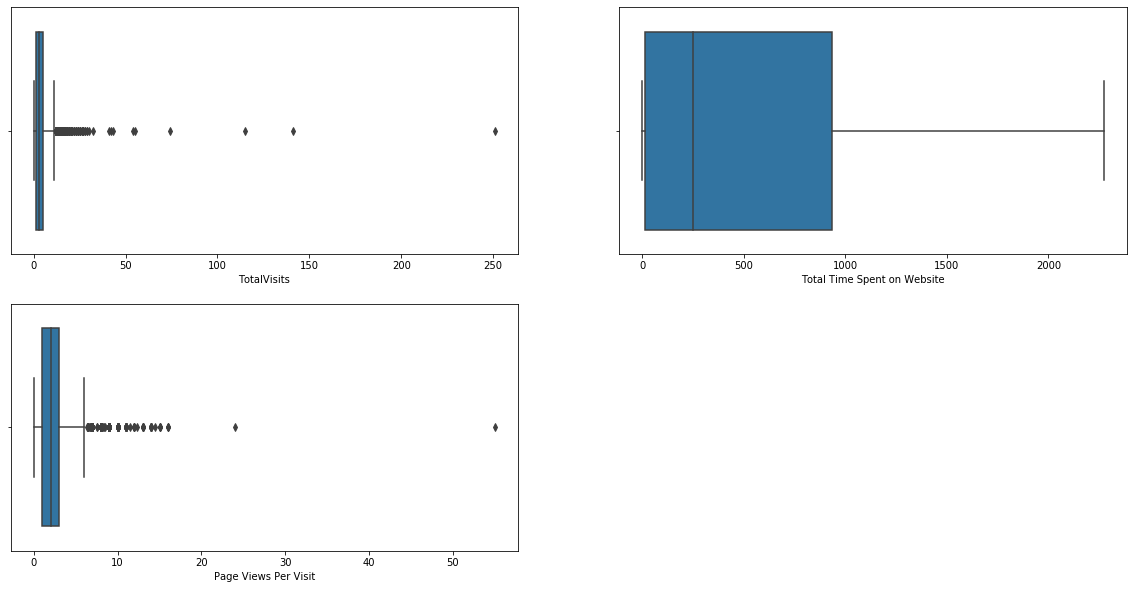

In [66]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(leads['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(leads['Page Views Per Visit'])

In [67]:
#create IQR for Total Visits
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

In [68]:
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 - leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

In [69]:
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 - leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

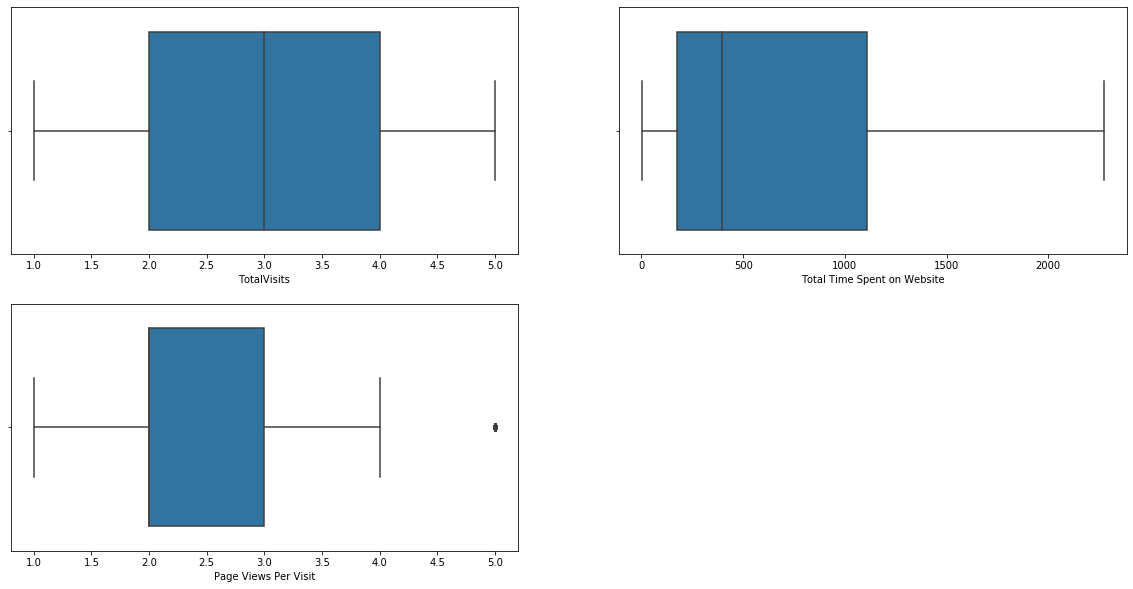

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(leads['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(leads['Page Views Per Visit'])

In [71]:
dummies = pd.get_dummies(leads.select_dtypes(include=['object']), drop_first=True)

clean_leads = leads.drop(leads.select_dtypes(include=['object']).columns, axis = 1)
clean_leads = pd.concat([clean_leads, dummies], axis = 1)

clean_leads.head(20)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_NaN,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_NaN,A free copy of Mastering The Interview_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,
660728,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
660727,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
660719,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660673,1,2.0,1640,2.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660624,0,2.0,71,2.00,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
660616,0,4.0,58,4.00,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
660558,0,5.0,170,5.00,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
660553,0,1.0,481,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


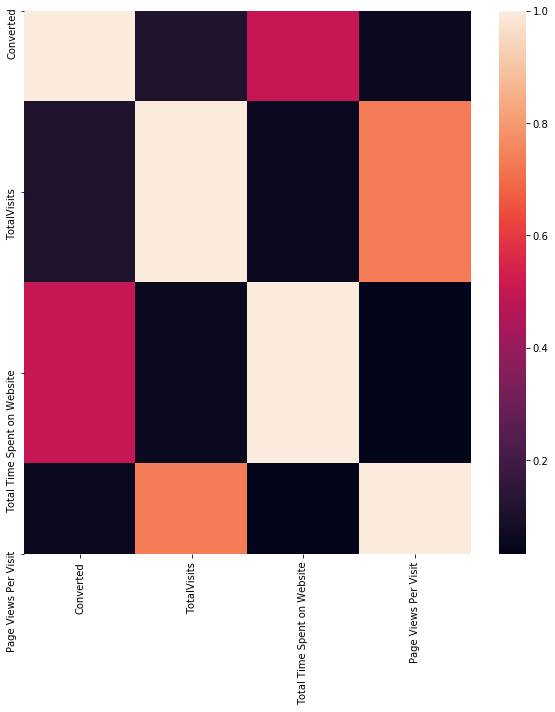

In [72]:
#interval data heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(leads.corr())
plt.show()

In [73]:
#sns.pairplot(data=clean_leads, vars=clean_leads[0:3], hue = 'converted', kind = 'reg', height = 3)
#plt.show()

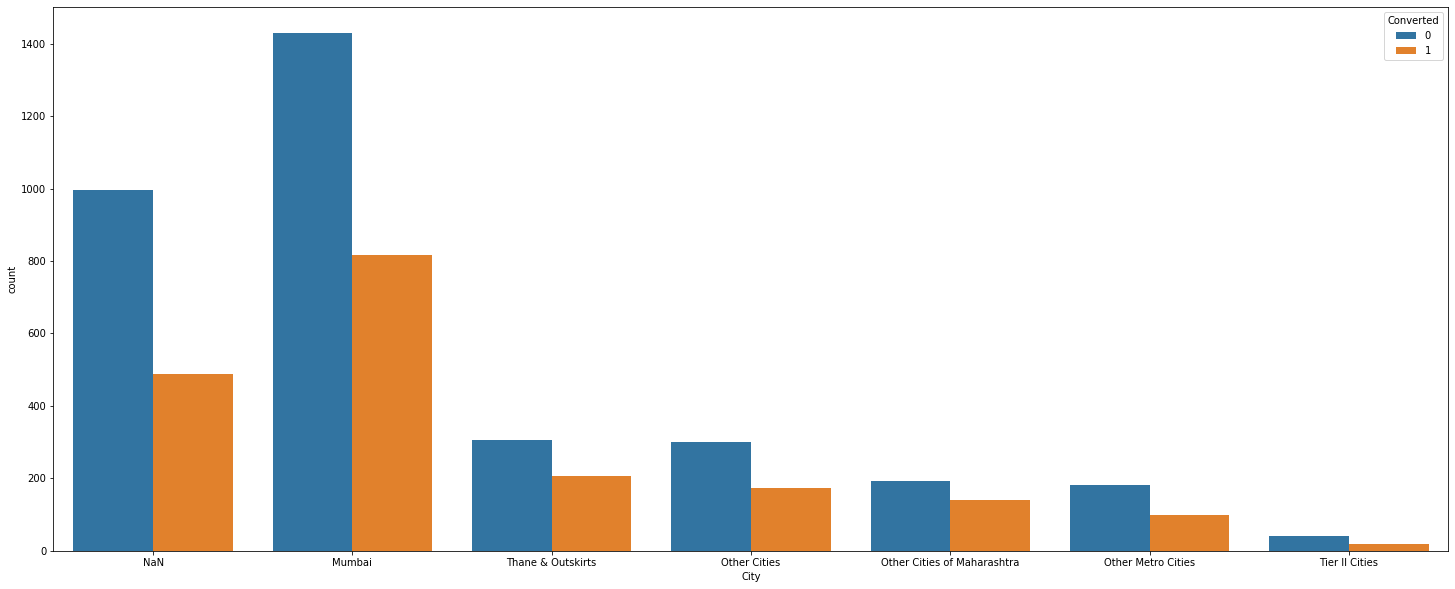

In [74]:
#They seem to have similair proptions of succuess in each city within india
plt.figure(figsize=(25,10))
sns.countplot(x ="City", hue ="Converted", data=leads)

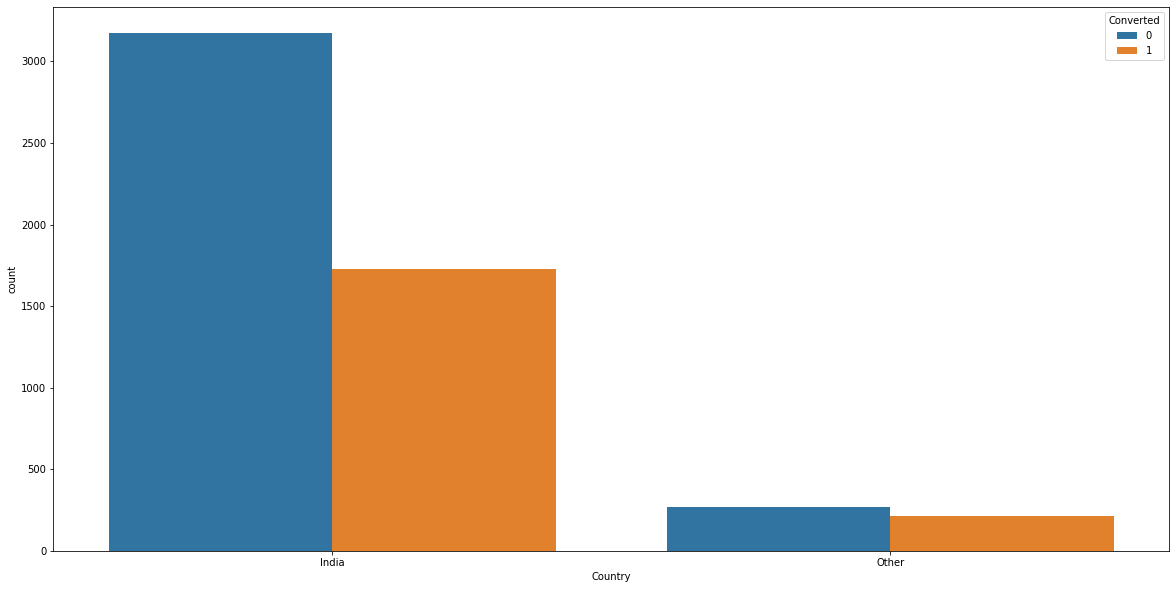

In [75]:
#they only seem to have much succuess in india
plt.figure(figsize=(20,10))
sns.countplot(x ="Country", hue ="Converted", data=leads)

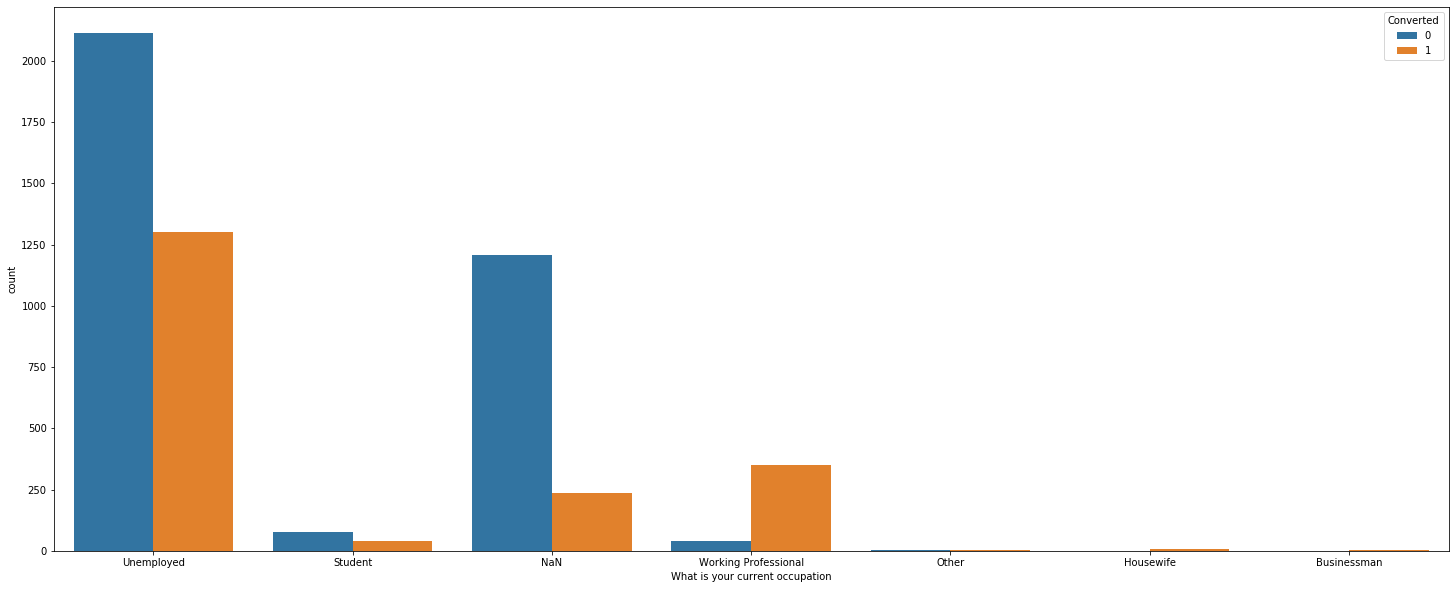

In [76]:
#More unemployed than any other category, but current workers are more likely to convert 
plt.figure(figsize=(25,10))
sns.countplot(x ="What is your current occupation", hue ="Converted", data=leads)

In [77]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview'],
      dtype='object')

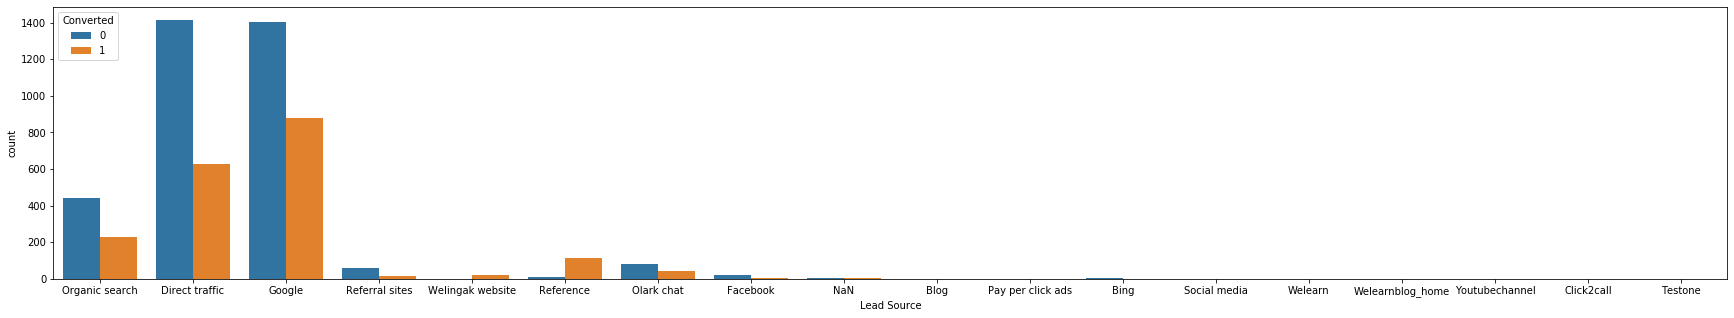

In [78]:
#references, Welingak get more conversions than not, Google, Search and Direct traffic do most of the volume
plt.figure(figsize=(30,5))
sns.countplot(x ="Lead Source", hue ="Converted", data=leads)

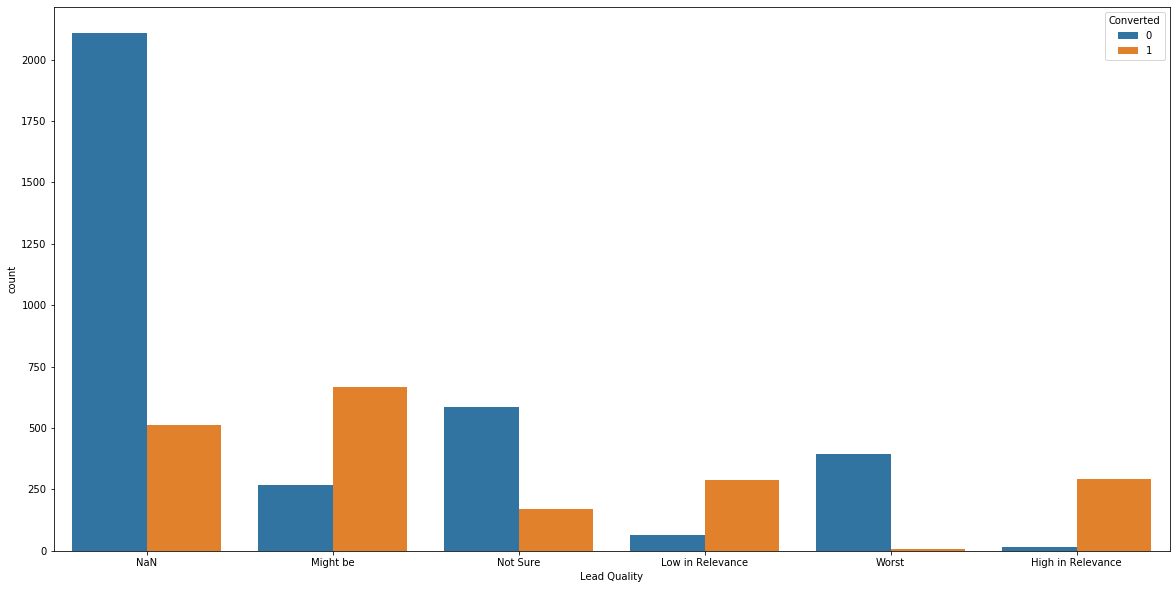

In [79]:
#their subjective opinons do no seem to be accurate except for high in relevance and worst. 
#Essentially they can tell if the leads are really bad or really good, but can't tell if they are in the middle. 
plt.figure(figsize=(20,10))
sns.countplot(x ="Lead Quality", hue ="Converted", data=leads)

In [80]:
clean_leads.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

A free copy of Mastering The Interview_Yes  A free copy of Mastering The Interview_Yes    1.000000
Lead Origin_Lead Import                     Lead Source_Facebook                          0.979704
Lead Source_Reference                       Lead Origin_Lead Add Form                     0.894764
City_NaN                                    Specialization_NaN                            0.849989
Tags_NaN                                    What is your current occupation_NaN           0.833391
Asymmetrique Profile Index_NaN              Asymmetrique Activity Index_02.Medium         0.830640
City_NaN                                    Lead Origin_Landing Page Submission           0.799232
What is your current occupation_NaN         What is your current occupation_Unemployed    0.796520
Specialization_NaN                          Lead Origin_Landing Page Submission           0.756793
Lead Profile_Potential Lead                 Lead Profile_NaN                              0.754327
Page Views

In [81]:
#drop variables that are high in multi-collinearity, particulaliry nan
clean_leads.drop(['Lead Origin_Lead Import', 'Lead Source_Reference', 'Lead Source_Facebook','Specialization_NaN', 'City_NaN', 
                  'Tags_NaN', 'Asymmetrique Activity Index_NaN','Asymmetrique Profile Index_NaN','Lead Quality_NaN',
                 'What is your current occupation_NaN','Lead Profile_NaN','Last Activity_NaN'], axis=1, inplace=True)

In [82]:
clean_leads.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

A free copy of Mastering The Interview_Yes            A free copy of Mastering The Interview_Yes    1.000000
Page Views Per Visit                                  TotalVisits                                   0.736732
Lead Source_Direct traffic                            Lead Source_Google                            0.670443
Tags_Will revert after reading the email              Converted                                     0.669747
Last Activity_Email Bounced                           Do Not Email_Yes                              0.667387
Lead Source_Direct traffic                            A free copy of Mastering The Interview_Yes    0.638871
Lead Source_Google                                    A free copy of Mastering The Interview_Yes    0.575952
Lead Quality_Worst                                    Lead Profile_Student of SomeSchool            0.549345
Lead Quality_Might be                                 Tags_Will revert after reading the email      0.510507
Last Activity_SMS S

ML Model

In [83]:
X = clean_leads.drop(['Converted'], axis = 1)
y= clean_leads['Converted']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

In [85]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,
633550,3.0,69,1.5,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
646662,3.0,1252,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
601226,2.0,1083,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
590140,3.0,1532,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
639109,3.0,89,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [86]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\PaulB\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4204
Model Family:                Binomial   Df Model:                          102
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -730.06
Date:                Sun, 24 May 2020   Deviance:                       1460.1
Time:                        18:23:46   Pearson chi2:                 8.31e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.3836      1.446     -3.723      0.000      -8.218      -2.550
TotalVisits                                                0.1606      0.092      1.754      0.079      -0.019       0.340
Total Time Spent on Website                                0.0020      0.000     15.174      0.000       0.002       0.002
Page Views Per Visit                                      -0.0837      0.092     -0.911      0.362      -0.264       0.096
Lead Origin_Landing Page Submission                       -0.2768      0.297     -0.932      0.351      -0.859       0.305
Lead Origin_Lead Add Form                                  0.8893      1.290      0.690      0.490      -1.638       3.417
Lead Origin_Quick Add Form                                24.2475   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Blog                                         -20.6167   2.16e+05  -9.55e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Click2call                                    24.8779   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct traffic                                 2.4707      1.243      1.988      0.047       0.035       4.907
Lead Source_Google                                         2.8681      1.236      2.321      0.020       0.446       5.290
Lead Source_NaN                                            1.7397      1.252      1.390      0.165      -0.713       4.193
Lead Source_Olark chat                                     2.8705      1.280      2.242      0.025       0.361       5.380
Lead Source_Organic search                                 2.6184      1.243      2.107      0.035       0.182       5.054
Lead Source_Pay per click ads                            -17.0716   2.16e+05  -7.91e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Referral sites                                 2.3947      1.367      1.751      0.080      -0.286       5.075
Lead Source_Social media                                   5.2408      9.750      0.537      0.591     -13.870      24.351
Lead Source_Testone                                    -2.222e-09   2.48e-05  -8.96e-05      1.000   -4.86e-05    4.86e-05
Lead Source_Welearn                                       24.2912   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Welearnblog_home                             -19.9720   2.16e+05  -9.25e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Welingak website                              26.0728    4.1e+04      0.001      0.999   -8.03e+04    8.04e+04
Lead Source_Youtubechannel                              7.357e-09   4.18e-05      0.000      1.000   -8.19e-05    8.19e-05
Do Not E

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logreg = LogisticRegression()

In [89]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4307
Model:                            GLM   Df Residuals:                     4205
Model Family:                Binomial   Df Model:                          101
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -737.57
Date:                Sun, 24 May 2020   Deviance:                       1475.1
Time:                        18:23:48   Pearson chi2:                 8.42e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
TotalVisits                                                0.1103      0.090      1.229      0.219      -0.066       0.286
Total Time Spent on Website                                0.0020      0.000     15.062      0.000       0.002       0.002
Page Views Per Visit                                      -0.0829      0.092     -0.904      0.366      -0.263       0.097
Lead Origin_Landing Page Submission                       -0.2620      0.295     -0.889      0.374      -0.839       0.315
Lead Origin_Lead Add Form                                 -1.9366      0.999     -1.938      0.053      -3.895       0.022
Lead Origin_Quick Add Form                                22.4938   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Blog                                         -23.0105   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Click2call                                    25.5195   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct traffic                                 0.0478      0.859      0.056      0.956      -1.635       1.731
Lead Source_Google                                         0.4362      0.850      0.513      0.608      -1.230       2.103
Lead Source_NaN                                            1.4655      1.493      0.982      0.326      -1.460       4.391
Lead Source_Olark chat                                     0.6435      0.934      0.689      0.491      -1.186       2.473
Lead Source_Organic search                                 0.2312      0.865      0.267      0.789      -1.464       1.926
Lead Source_Pay per click ads                            -19.4096   2.16e+05  -8.98e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Referral sites                                 0.0689      1.043      0.066      0.947      -1.975       2.113
Lead Source_Social media                                   2.7688      9.635      0.287      0.774     -16.116      21.654
Lead Source_Testone                                     4.667e-09   3.24e-05      0.000      1.000   -6.35e-05    6.35e-05
Lead Source_Welearn                                       21.9794   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Welearnblog_home                             -22.4388   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Welingak website                              26.2572   3.85e+04      0.001      0.999   -7.55e+04    7.55e+04
Lead Source_Youtubechannel                             -1.042e-09   1.78e-05  -5.84e-05      1.000    -3.5e-05     3.5e-05
Do Not Email_Yes                                          -0.9790      0.387     -2.529      0.011      -1.738      -0.220
Last Act

In [90]:
y_train_pred = res.predict(X_train)

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Number
0,0,0.014367,633550
1,1,0.998644,646662
2,1,0.137179,601226
3,1,0.999525,590140
4,0,0.110092,639109


In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Number,Predicted
0,0,0.014367,633550,0
1,1,0.998644,646662,1
2,1,0.137179,601226,0
3,1,0.999525,590140,1
4,0,0.110092,639109,0


In [96]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.935453912235895
